## Extracting necessary features in the Raw dataset and saving it in a new file named "genes.csv" and also handling the missing values.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the data
file_path = '/content/train_genetic_disorders.csv'
df = pd.read_csv(file_path)

# List of unnecessary features
unnecessary_features = ['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Mother\'s age', 'Institute Name', 'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Place of birth', 'Folic acid details (peri-conceptional)']

# Remove unnecessary features
df.drop(unnecessary_features, axis=1, inplace=True)

# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()

# Create an imputer object with most_frequent imputation strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the entire dataframe
imputer.fit(df)

# Impute the missing values
df[:] = imputer.transform(df)

# Save the remaining features to a CSV file named 'genes.csv'
genes_df = df
genes_df.to_csv('genes.csv', index=False)

## Building and Evaluating the Random forest model.

        Patient Age  Blood cell count (mcL)  Father's age  \
count  22083.000000            22083.000000  22083.000000   
mean       7.530091                4.859864     35.224471   
std        4.370596                0.260807     14.833692   
min        0.000000                4.092727     20.000000   
25%        4.000000                4.737759     20.000000   
50%        8.000000                4.886940     32.000000   
75%       12.000000                5.025826     48.000000   
max       14.000000                5.609829     64.000000   

       No. of previous abortion  \
count              22083.000000   
mean                   2.000091   
std                    1.307770   
min                    0.000000   
25%                    1.000000   
50%                    2.000000   
75%                    3.000000   
max                    4.000000   

       White Blood cell count (thousand per microliter)     Symptom 1  \
count                                      22083.000000  2208

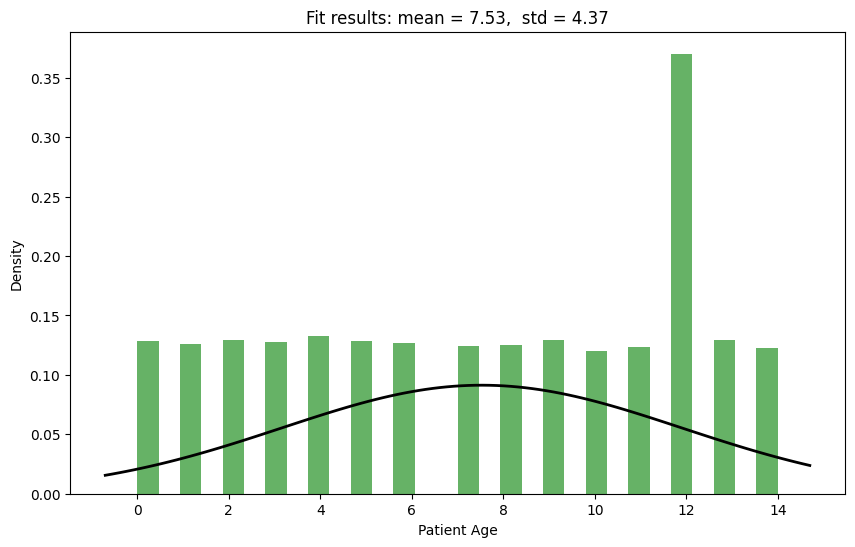

Kolmogorov-Smirnov test: statistic=0.13714516223943285, p-value=0.0
Chi-Square Test Results:
                Variable 1                                    Variable 2  \
0   Genes in mother's side                         Inherited from father   
1   Genes in mother's side                                 Maternal gene   
2   Genes in mother's side                                 Paternal gene   
3   Genes in mother's side  History of anomalies in previous pregnancies   
4   Genes in mother's side                                 Birth defects   
..                     ...                                           ...   
61               Symptom 2                                     Symptom 4   
62               Symptom 2                                     Symptom 5   
63               Symptom 3                                     Symptom 4   
64               Symptom 3                                     Symptom 5   
65               Symptom 4                                     Symptom 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py

Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1919
           1       0.57      1.00      0.72      2498

    accuracy                           0.57      4417
   macro avg       0.28      0.50      0.36      4417
weighted avg       0.32      0.57      0.41      4417

Confusion Matrix:
[[   0 1919]
 [   0 2498]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset into a pandas DataFrame
df = pd.read_csv('/content/genes.csv')
df.head()

print(df.describe())
print(df.info())
df = df.dropna()
df.head()

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object','category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Scale the data
scaler = StandardScaler()
X = df.drop(['Birth defects'], axis=1)  # Assuming 'Birth defects' is the target variable
y = df['Birth defects']
X_scaled = scaler.fit_transform(X)

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Choose a column to analyze
column_to_analyze = 'Patient Age'  # Example column (continuous)

# Plot histogram and fit a normal distribution for continuous data
if df[column_to_analyze].dtype in [np.float64, np.int64]:
    data = df[column_to_analyze].dropna()
    mean, std = np.mean(data), np.std(data)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

    # Plot the normal distribution fit
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mean = {mean:.2f},  std = {std:.2f}"
    plt.title(title)
    plt.xlabel(column_to_analyze)
    plt.ylabel('Density')
    plt.show()

    # Goodness of fit test (Kolmogorov-Smirnov)
    kstest = stats.kstest(data, 'norm', args=(mean, std))
    print(f'Kolmogorov-Smirnov test: statistic={kstest.statistic}, p-value={kstest.pvalue}')
from scipy.stats import chi2_contingency, pearsonr, spearmanr
import seaborn as sns
# Convert categorical variables to category type if not already
categorical_columns = [
    'Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene',
    'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result',
    'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Perform chi-square test for pairs of categorical variables
results = []
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append((col1, col2, chi2, p))

# Display the chi-square test results
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi-square', 'P-value'])
print("Chi-Square Test Results:")
print(results_df)

significant_chi_square = results_df[results_df['P-value'] < 0.05]
print("Significant Chi-Square Test Results (P-value < 0.05):")
print(significant_chi_square)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Preprocess the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)



# Define the hyperparameter tuning space for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'qrt', 'log2']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}")

# Train a new Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(**best_params)
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



In [ ]:
X_test.shape

(4417, 24)

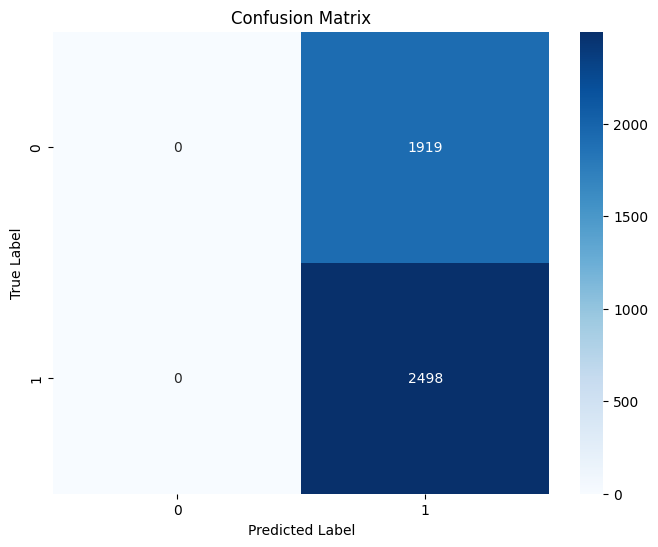

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Building the Predictive model with Lstm, Svm, Logistic Regression,Gradient boost, and Comparing it with Random Forest.

1. Logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the Logistic Regression model
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {accuracy_lr:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Test Accuracy: 0.56
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.15      0.23      1919
           1       0.57      0.87      0.69      2498

    accuracy                           0.56      4417
   macro avg       0.52      0.51      0.46      4417
weighted avg       0.53      0.56      0.49      4417

Logistic Regression Confusion Matrix:
[[ 290 1629]
 [ 324 2174]]


2. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Define and train the SVM model
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate the SVM model
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Test Accuracy: 0.55
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.15      0.23      1919
           1       0.57      0.86      0.69      2498

    accuracy                           0.55      4417
   macro avg       0.52      0.51      0.46      4417
weighted avg       0.52      0.55      0.49      4417

SVM Confusion Matrix:
[[ 296 1623]
 [ 346 2152]]


3. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define and train the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Evaluate the Gradient Boosting model
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Test Accuracy: {accuracy_gb:.2f}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Test Accuracy: 0.56
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.06      0.10      1919
           1       0.57      0.95      0.71      2498

    accuracy                           0.56      4417
   macro avg       0.52      0.50      0.41      4417
weighted avg       0.53      0.56      0.45      4417

Gradient Boosting Confusion Matrix:
[[ 109 1810]
 [ 122 2376]]


4. LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

# Reshape data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Encode the labels for LSTM
y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[1])))
model.add(Dense(y_train_lstm.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=64, verbose=1)

# Evaluate the LSTM model
loss, accuracy_lstm = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"LSTM Test Accuracy: {accuracy_lstm:.2f}")


Epoch 1/100
277/277 [==============================] - 4s 6ms/step - loss: 0.6679 - accuracy: 0.5601
Epoch 2/100
277/277 [==============================] - 2s 6ms/step - loss: 0.6590 - accuracy: 0.5718
Epoch 3/100
277/277 [==============================] - 1s 4ms/step - loss: 0.6563 - accuracy: 0.5748
Epoch 4/100
277/277 [==============================] - 1s 4ms/step - loss: 0.6542 - accuracy: 0.5764
Epoch 5/100
277/277 [==============================] - 1s 4ms/step - loss: 0.6523 - accuracy: 0.5776
Epoch 6/100
277/277 [==============================] - 1s 3ms/step - loss: 0.6511 - accuracy: 0.5783
Epoch 7/100
277/277 [==============================] - 1s 4ms/step - loss: 0.6495 - accuracy: 0.5837
Epoch 8/100
277/277 [==============================] - 1s 4ms/step - loss: 0.6477 - accuracy: 0.5837
Epoch 9/100
277/277 [==============================] - 1s 4ms/step - loss: 0.6468 - accuracy: 0.5889
Epoch 10/100
277/277 [==============================] - 1s 4ms/step - loss: 0.6449 - accura

## Comparing the Accuracy of All builded model.

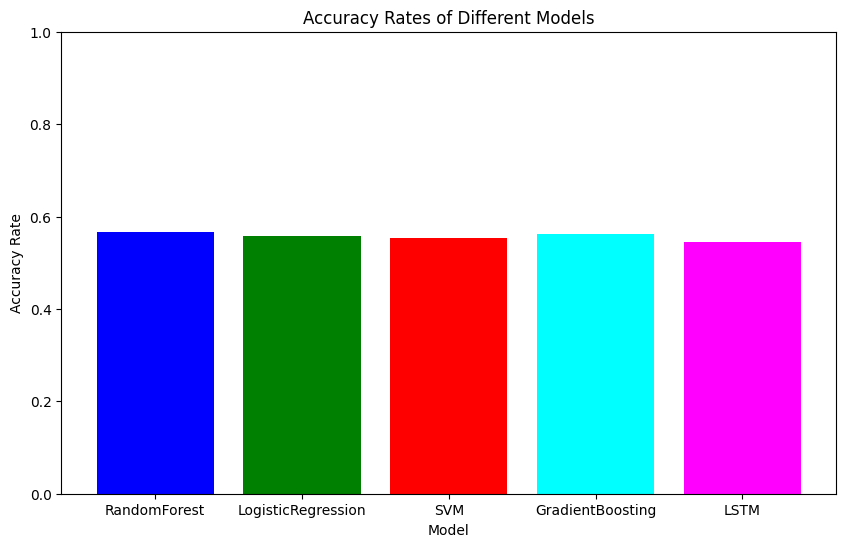

In [ ]:
import matplotlib.pyplot as plt

# Accuracy rates
accuracies = {
    "RandomForest":accuracy ,
    "LogisticRegression": accuracy_lr,
    "SVM": accuracy_svm,
    "GradientBoosting": accuracy_gb,
    "LSTM": accuracy_lstm
}

# Plot accuracy rates
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'cyan', 'magenta'])
plt.xlabel('Model')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates of Different Models')
plt.ylim(0, 1)
plt.show()


## Making Out of Sample Prediction and Visualize the Prediction.

   RandomForest
0             1
1             1
2             1
3             1
4             1


<Figure size 1000x600 with 0 Axes>

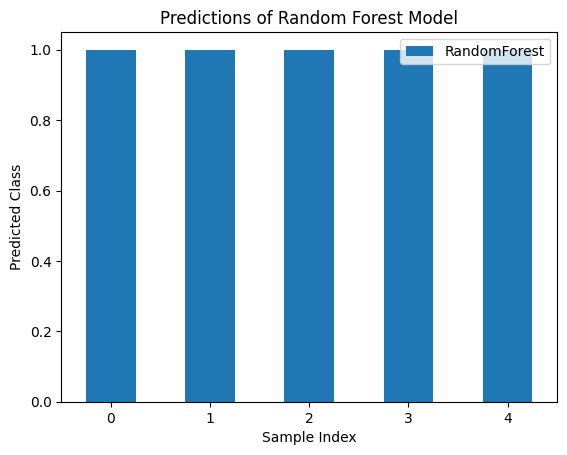

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load your dataset into a pandas DataFrame
df = pd.read_csv('genes.csv')
df = df.dropna()  # Remove any rows with missing values

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define the feature set and target variable
X = df.drop(['Birth defects'], axis=1)
y = df['Birth defects']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make out-of-sample predictions
new_data = pd.DataFrame({
    'Patient Age': [35, 28, 32, 40, 22],
    'Genes in mother\'s side': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Inherited from father': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Maternal gene': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Paternal gene': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Blood cell count (mcL)': [5500, 4800, 5200, 6000, 4500],
    'Father\'s age': [35, 30, 40, 45, 25],
    'Birth asphyxia': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Autopsy shows birth defect (if applicable)': ['Not applicable', 'Not applicable', 'Not applicable', 'Not applicable', 'Not applicable'],
    'H/O serious maternal illness': ['No', 'Yes', 'No', 'Yes', 'No'],
    'H/O radiation exposure (x-ray)': ['No', 'Yes', 'No', 'Yes', 'No'],
    'H/O substance abuse': ['No', 'No', 'Yes', 'No', 'Yes'],
    'Assisted conception IVF/ART': ['No', 'Yes', 'No', 'Yes', 'No'],
    'History of anomalies in previous pregnancies': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'No. of previous abortion': [0, 1, 0, 1, 0],
    'Birth defects': [0, 0, 0, 0, 0],
    'White Blood cell count (thousand per microliter)': [6, 5, 7, 8, 4],
    'Blood test result': ['normal', 'normal', 'normal', 'normal', 'normal'],
    'Symptom 1': [0, 1, 0, 1, 0],
    'Symptom 2': [1, 0, 1, 0, 1],
    'Symptom 3': [0, 1, 0, 1, 0],
    'Symptom 4': [1, 0, 1, 0, 1],
    'Symptom 5': [0, 1, 0, 1, 0],
    'Genetic Disorder': [0, 0, 0, 0, 0],
    'Disorder Subclass': [0, 0, 0, 0, 0]
})

# Encode the categorical features of the new data using the same label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])

# Scale the new data
new_data_scaled = scaler.transform(new_data.drop(['Birth defects'], axis=1))

# Make predictions
new_data_pred_rf = rf_classifier.predict(new_data_scaled)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'RandomForest': new_data_pred_rf,
}, index=new_data.index)

print(predictions_df)

# Visualize the predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
predictions_df.plot(kind='bar')
plt.title('Predictions of Random Forest Model')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Class')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


## Identifying the risk factors of Birth defects

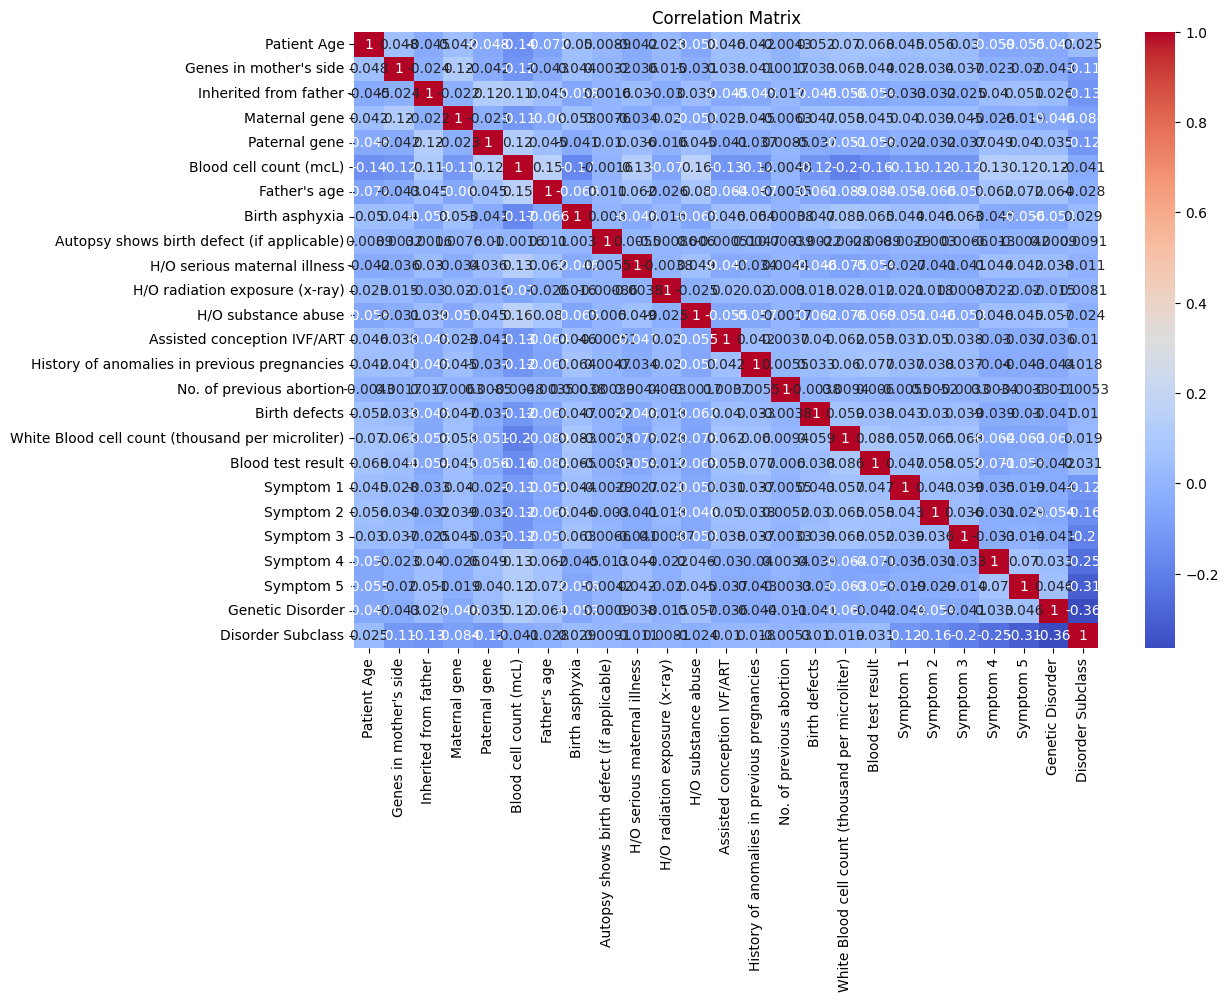

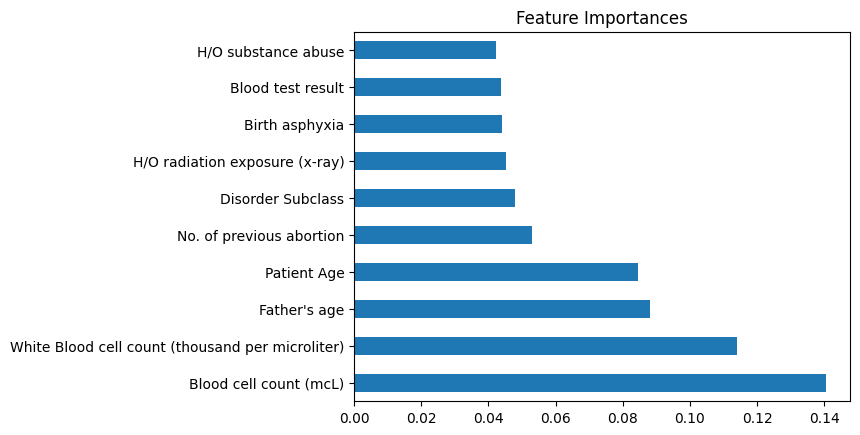

                                             Feature  Chi2 Score  \
6                                       Father's age  505.657447   
0                                        Patient Age  153.699336   
11                               H/O substance abuse   89.092561   
15  White Blood cell count (thousand per microliter)   81.313092   
22                                  Genetic Disorder   41.340191   
7                                     Birth asphyxia   37.215698   
2                              Inherited from father   27.719111   
9                       H/O serious maternal illness   26.603509   
16                                 Blood test result   24.711365   
20                                         Symptom 4   19.187574   
3                                      Maternal gene   17.997257   
4                                      Paternal gene   17.297070   
12                       Assisted conception IVF/ART   15.396957   
17                                         Sympt

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv('genes.csv')

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Scale the data
scaler = StandardScaler()
X = df.drop(['Birth defects'], axis=1)  # Assuming 'Birth defects' is the target variable
y = df['Birth defects']
X_scaled = scaler.fit_transform(X)

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Train Random Forest to get feature importances
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_scaled, y)
importances = rf_classifier.feature_importances_

# Plot feature importances
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Chi-Square test for categorical features
chi_scores = chi2(X, y)
chi_scores_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores[0], 'P-value': chi_scores[1]})
print(chi_scores_df.sort_values(by='Chi2 Score', ascending=False))

# ANOVA test for continuous features
from scipy.stats import f_oneway

anova_results = []
for column in df.select_dtypes(include=[np.number]).columns:
    groups = [df[df['Birth defects'] == value][column] for value in df['Birth defects'].unique()]
    f_val, p_val = f_oneway(*groups)
    anova_results.append((column, f_val, p_val))

anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F-value', 'P-value'])
print(anova_df.sort_values(by='F-value', ascending=False))
